In [164]:
# Importing libraries 
import os 
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [165]:
# Set working directory 
os.chdir("D:\Data Scientist\Project\Bike Renting")

In [166]:
#Import date set 
Bike = pd.read_csv("day.csv", encoding = 'ISO - 8859 -1')


In [167]:
###Exploratory Data Analysis
#Understand the data 
Bike.shape

(731, 16)

In [168]:
Bike.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [169]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [170]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [171]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [172]:
#Convert the data type
num_names = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [173]:
num_names

['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [174]:
cat_names

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [175]:
Bike[num_names].nunique()

instant       731
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [176]:
Bike[cat_names].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [177]:
#Convert categorical variable 
for col in cat_names:
        Bike[col] = Bike[col].astype('object')

In [178]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [179]:
# Convert numaric or continuous variables
for col in num_names:
        Bike[col] = Bike[col].astype('float')

In [180]:
Bike['dteday'].apply(str)

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
5      2011-01-06
6      2011-01-07
7      2011-01-08
8      2011-01-09
9      2011-01-10
10     2011-01-11
11     2011-01-12
12     2011-01-13
13     2011-01-14
14     2011-01-15
15     2011-01-16
16     2011-01-17
17     2011-01-18
18     2011-01-19
19     2011-01-20
20     2011-01-21
21     2011-01-22
22     2011-01-23
23     2011-01-24
24     2011-01-25
25     2011-01-26
26     2011-01-27
27     2011-01-28
28     2011-01-29
29     2011-01-30
          ...    
701    2012-12-02
702    2012-12-03
703    2012-12-04
704    2012-12-05
705    2012-12-06
706    2012-12-07
707    2012-12-08
708    2012-12-09
709    2012-12-10
710    2012-12-11
711    2012-12-12
712    2012-12-13
713    2012-12-14
714    2012-12-15
715    2012-12-16
716    2012-12-17
717    2012-12-18
718    2012-12-19
719    2012-12-20
720    2012-12-21
721    2012-12-22
722    2012-12-23
723    2012-12-24
724    2012-12-25
725    201

In [181]:
#Convetr the Date variable
Bike['dteday'] = pd.to_datetime(Bike['dteday'], 
format='%Y-%m-%d')

# Missing value analysis

In [182]:
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [183]:
#There is no missing value present in the given dataset so no need to perform any action 

# Outlier Analysis 

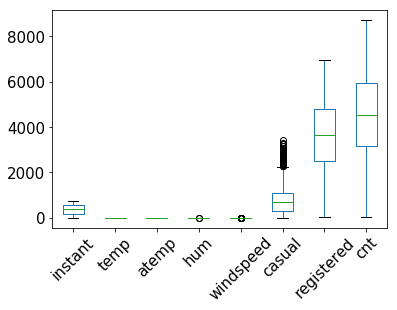

In [184]:
boxplot = Bike.boxplot(grid=False, rot=45, fontsize=15)

In [185]:
## In the data hum, windspeed and casual variables contains outliers 

In [186]:
cnames = ["hum","windspeed","casual"]

In [187]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(Bike.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    
# Let's go ahead by replacing outliers with capingby the values above the upperfence to 75th percentile and below the lowerfence to 25th percentile  

    Bike.loc[Bike[i]<Innerfence, i] = q25
    Bike.loc[Bike[i]>Upperfence, i] = q75

hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
casual
Innerfence= -855.25
Upperfence= 2266.75
IQR =780.5


# Feature selection 

In [188]:
num_names

['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [189]:
# corelation analysis

Bike_corr=Bike.loc[:,num_names]

In [190]:
Bike_corr.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


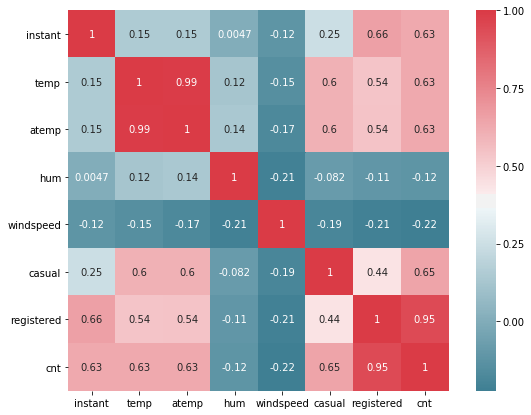

In [191]:
# set width and hight of the plot

f,ax=plt.subplots(figsize=(10,7))

#generating corr plot

corr=Bike_corr.corr()

# plot using seaborn lib

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),annot=True,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [192]:
#temp and atemp can be observed as they are highly correlated
#Thus we need to drop one of them
#Temp is the actual temperature whereas atemp is the feeling value of temperature
#Feeling temperature is more impprtant when it comes to real life


#Also casual, registered and cnt are positively correlated
#Moreover sum of casual and registered forms cnt variable

In [193]:
aov=ols('cnt~season+yr+mnth+holiday+weekday+workingday+weathersit',data=Bike).fit()

In [194]:
aov_table=sm.stats.anova_lm(aov,typ=2)

In [195]:
aov_table

,sum_sq,df,F,PR(>F)
season,6.632745e+07,3.0,30.438053,1.635986e-18
yr,8.281765e+08,1.0,1140.165127,1.645182e-149
mnth,1.756683e+08,11.0,21.985966,8.868496e-39
holiday,2.982315e+05,1.0,0.410581,5.218829e-01
weekday,1.621156e+07,6.0,3.719791,1.193190e-03
workingday,1.897657e+07,1.0,26.125377,4.123844e-07
weathersit,1.856596e+08,2.0,127.800423,4.274469e-48
Residual,5.128140e+08,706.0,NaN,NaN


In [196]:
#Dimensionality Reduction
Bike=Bike.drop(["instant","casual","registered","temp","dteday"],axis=1)

In [197]:
Bike.shape


(731, 11)

In [198]:
#Till here, our features are selected and they are already normalized.
# We don't need to perform feature scaling
Bike.to_csv("Clean_Bike.csv",sep="\t")

In [199]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985.0
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801.0
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349.0
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562.0
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600.0


# Model development 

In [200]:
## dividing data into train and test
train,test = train_test_split(Bike,test_size= 0.2)

In [201]:
Bike.shape

(731, 11)

In [202]:
train.shape

(584, 11)

In [203]:
test.shape#Error metrix
from sklearn.metrics import mean_squared_error
from math import sqrt
def MAPE(y,yhat):
    print(np.mean(np.abs((y - yhat) / y))*100)

# Decision Tree Regression
# MAPE = 13.09
# Acurracy = 86.91

In [204]:
dt_model = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:11],train.iloc[:,10])

In [205]:
dt_model

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [206]:
predictions_dt = dt_model.predict(test.iloc[:,0:11])

In [207]:
MAPE(test.iloc[:,10], predictions_dt)

14.94362486948926


# Random forest
# n = 100
# Acurracy = 84.62
# MAPE = 15.38

In [208]:
X_train, X_test, y_train, y_test = train_test_split( Bike.iloc[:, Bike.columns != 'cnt'], Bike.iloc[:, 10], test_size = 0.20, random_state = 1)

In [209]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 1).fit(X_train,y_train)

In [210]:
#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

In [211]:
MAPE(y_test, rf_predictions)

15.38571835403193


# Random forest
# n = 200
# Acurracy = 84.56
# MAPE = 15.44

In [212]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 1).fit(X_train,y_train)

In [213]:
rf_predictions = rf_model.predict(X_test)

In [214]:
MAPE(y_test, rf_predictions)

15.440473637185395


# Random forest
# n = 300
# Acurracy = 84.67
# MAPE = 15.33

In [215]:
rf_model = RandomForestRegressor(n_estimators = 300, random_state = 1).fit(X_train,y_train)

In [216]:
rf_predictions = rf_model.predict(X_test)

In [217]:
MAPE(y_test, rf_predictions)

15.33286964658816


# Linear Regression
# MAPE = 17.20
# Acurracy = 82.8

In [218]:
#Train the model using the train data set 
lr_model = sm.OLS(train.iloc[:,10],train.iloc[:,0:10].astype(float)).fit()

In [219]:
#print the model stats
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1765.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:14:55   Log-Likelihood:                -4787.6
No. Observations:                 584   AIC:                             9595.
Df Residuals:                     574   BIC:                             9639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       540.8178     60.283      8.971      0.000     422.415     659.220
yr          2132.5854     72.695     29.336      0.000    1989.805    2275.366
mnth         -47.9465     19.114     -2.509      0.012     -85.488     -10.405
holiday     -497.4873    256.822     -1.937      0.053   -1001.914       6.939
weekday      103.9709     17.776      5.849      0.000      69.056     138.885
workingday   157.2004     80.289      1.958      0.051      -0.496     314.897
weathersit  -671.0496     89.338     -7.511      0.000    -846.519    -495.580
atemp       6400.9790    243.992     26.234      0.000    5921.752    6880.206
hum          -34.1074    303.047     -0.113      0.910    -629.324     561.110
windspeed   -492.4075    440.817     -1.117      0.264   -1358.219     373.404
==============================================================================
Omnibus:                       70.695   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.500
Skew:                          -0.711   Prob(JB):                     5.10e-31
Kurtosis:                       4.927   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
#From the summary of the linear regression model 
# R-squared value is 0.965 thatis the linear regression model explains 96.5% of the target variable is explained by the all independent varibles.

In [221]:
#predict 
prediction_lr = lr_model.predict(test.iloc[:,0:10])

In [222]:
MAPE(y_test,prediction_lr)

24.873964969494356
